In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,exact_u_err,Move_Time_1D
from B_Plotting import Burgers_plot, loss_plot 

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_GPT_activation import P
from B_GPT_PINN import GPT
from B_GPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
nu_training = np.linspace(0.5,1,21)
number_of_neurons = 1
largest_loss_list = np.ones(number_of_neurons)
print(f"Expected Final GPT-PINN Depth: {[2,number_of_neurons,1]}\n")
P_list = np.ones(number_of_neurons, dtype=object)
nu_pinn_train   = 1.0    

Expected Final GPT-PINN Depth: [2, 1, 1]



In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.0
Ti, Tf         =  0.0, 1.0
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.0002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)


BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

In [4]:
# Setting PINN and VGPT-PINN
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
layers_pinn = np.array([2, 20,20,20,20, 1])

lr_gpt          = 0.01
epochs_gpt      = 4000
tol_gpt         = 1e-4

###############################################################################
################################ Training Loop ################################
###############################################################################

In [5]:
import pickle
P_name=f"IFNN_rare.pkl"
#P_name=f"IFNN_rare_wc_0308.pkl"
with open(P_name, 'rb') as f:
    P_list = pickle.load(f)

0.5 stopped at epoch: 0 | gpt_loss: 3.84344220161438,rMAE: [0.7208059430122375], rRMSE:[0.8365827202796936], 0.09375022351741791, 0.12501171231269836, 0.24995745718479156, 0.0
0.5 stopped at epoch: 200 | gpt_loss: 0.02341294102370739,rMAE: 0.12684005498886108, rRMSE:0.16636121273040771, 0.007238779217004776, 0.0016100924694910645, 7.323740646825172e-06, 0.0
0.5 stopped at epoch: 400 | gpt_loss: 0.004961266648024321,rMAE: 0.06403850764036179, rRMSE:0.09812057018280029, 0.004887504503130913, 4.470947715162765e-06, 2.905264864239143e-06, 0.0
0.5 stopped at epoch: 600 | gpt_loss: 0.004496084060519934,rMAE: 0.05198920890688896, rRMSE:0.08233451843261719, 0.004430245142430067, 3.909437509719282e-06, 2.6744337446871214e-06, 0.0
0.5 stopped at epoch: 800 | gpt_loss: 0.004015683196485043,rMAE: 0.039380863308906555, rRMSE:0.06435193866491318, 0.0039560203440487385, 3.4980912460014224e-06, 2.4682153707544785e-06, 0.0
0.5 stopped at epoch: 1000 | gpt_loss: 0.003676757449284196,rMAE: 0.026860063895

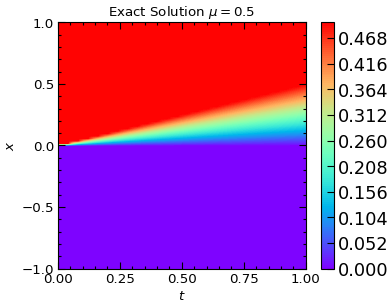

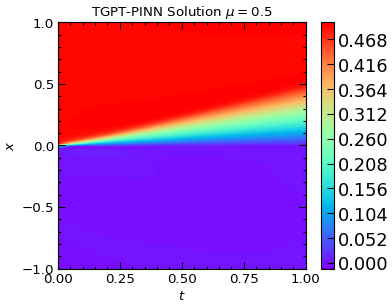

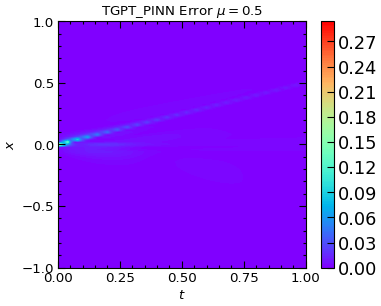

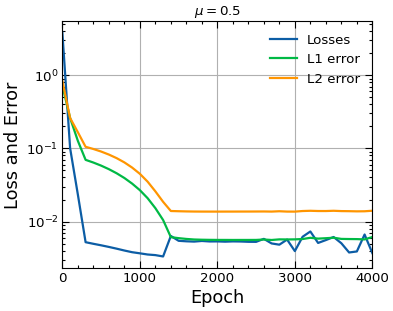

GPT-PINN at 0.5 with the Loss=0.003699725493788719, rMAE = 0.0061410823836922646, rRMSE = 0.014041719026863575


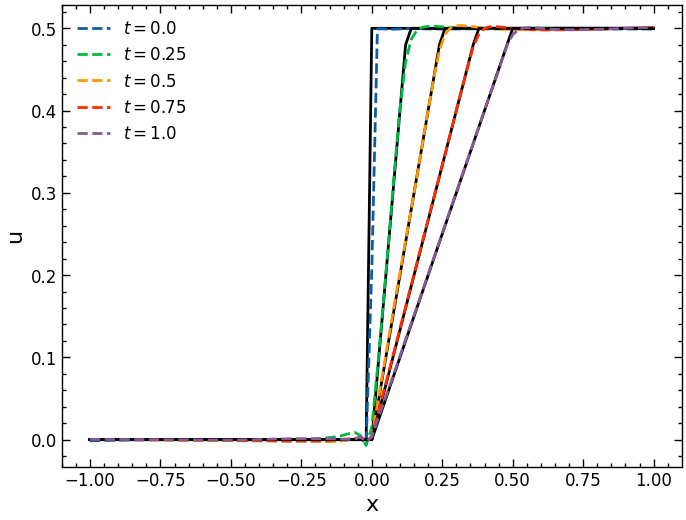

0.525 stopped at epoch: 0 | gpt_loss: 3.4708340167999268,rMAE: [0.6505668759346008], rRMSE:[0.7579010128974915], 0.08675061911344528, 0.11282366514205933, 0.2255847007036209, 0.0
0.525 stopped at epoch: 200 | gpt_loss: 0.013958990573883057,rMAE: 0.08681986480951309, rRMSE:0.12451726943254471, 0.006425795145332813, 0.0007477257749997079, 5.593826244876254e-06, 0.0
0.525 stopped at epoch: 400 | gpt_loss: 0.005183667875826359,rMAE: 0.05465839430689812, rRMSE:0.08499310165643692, 0.005130828358232975, 3.3908004297700245e-06, 1.8931325485027628e-06, 0.0
0.525 stopped at epoch: 600 | gpt_loss: 0.004639273509383202,rMAE: 0.0414687804877758, rRMSE:0.06668225675821304, 0.004589344374835491, 3.15556644636672e-06, 1.8373623333900468e-06, 0.0
0.525 stopped at epoch: 800 | gpt_loss: 0.004158242605626583,rMAE: 0.027871133759617805, rRMSE:0.046076055616140366, 0.004114882554858923, 2.625575916681555e-06, 1.7104098333220463e-06, 0.0
0.525 stopped at epoch: 1000 | gpt_loss: 0.0038916778285056353,rMAE: 

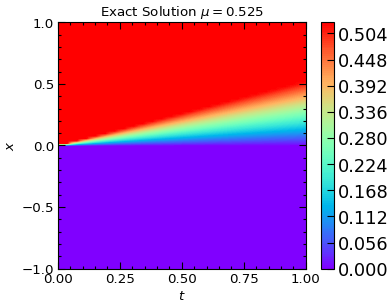

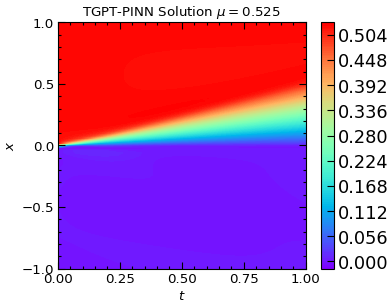

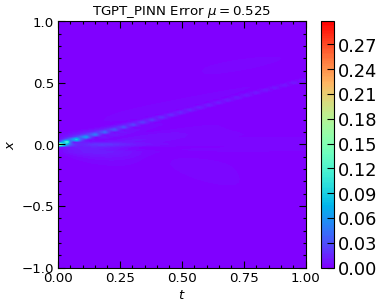

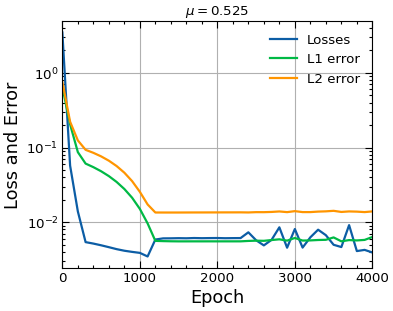

GPT-PINN at 0.525 with the Loss=0.003943122923374176, rMAE = 0.006346668116748333, rRMSE = 0.013969913125038147


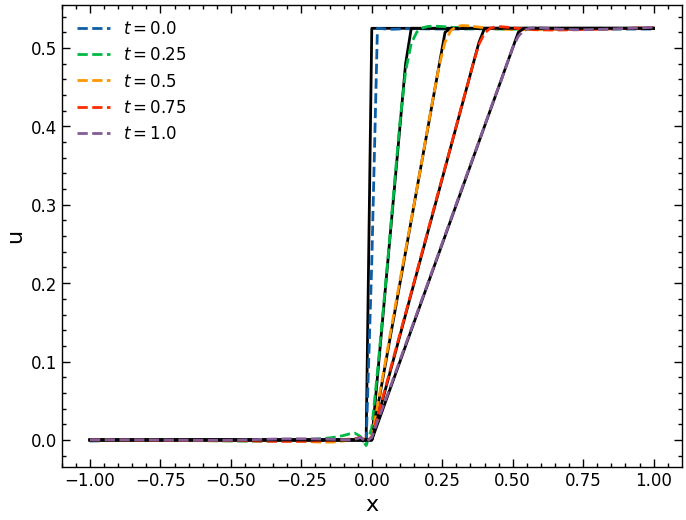

0.55 stopped at epoch: 0 | gpt_loss: 3.1174378395080566,rMAE: [0.5867871642112732], rRMSE:[0.6863094568252563], 0.08021309971809387, 0.10126058012247086, 0.20246189832687378, 0.0
0.55 stopped at epoch: 200 | gpt_loss: 0.006177970673888922,rMAE: 0.062333256006240845, rRMSE:0.09419877827167511, 0.006071474403142929, 9.027930900629144e-06, 1.6217168194998521e-06, 0.0
0.55 stopped at epoch: 400 | gpt_loss: 0.005495877005159855,rMAE: 0.047180648893117905, rRMSE:0.07386831194162369, 0.005448495037853718, 3.182573436788516e-06, 1.5556386188109173e-06, 0.0
0.55 stopped at epoch: 600 | gpt_loss: 0.0048387241549789906,rMAE: 0.032209210097789764, rRMSE:0.052151937037706375, 0.00479284580796957, 3.060166136492626e-06, 1.5276608564818162e-06, 0.0
0.55 stopped at epoch: 800 | gpt_loss: 0.004426446743309498,rMAE: 0.017579039558768272, rRMSE:0.02923516556620598, 0.0043943640775978565, 1.8252592326462036e-06, 1.383016751788091e-06, 0.0
0.55 stopped at epoch: 1000 | gpt_loss: 0.007744892500340939,rMAE: 

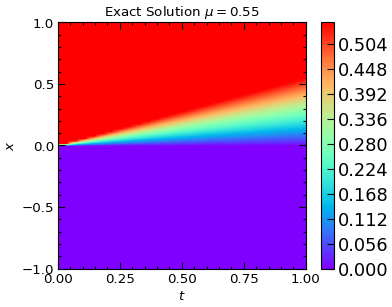

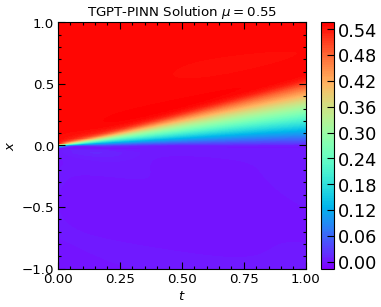

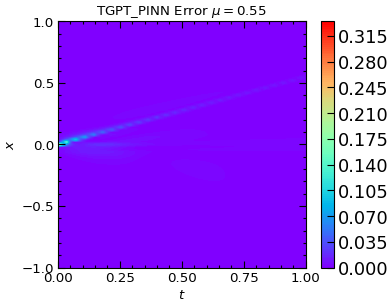

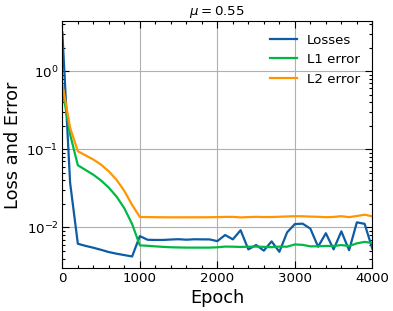

GPT-PINN at 0.55 with the Loss=0.005333131179213524, rMAE = 0.006316869053989649, rRMSE = 0.01384642068296671


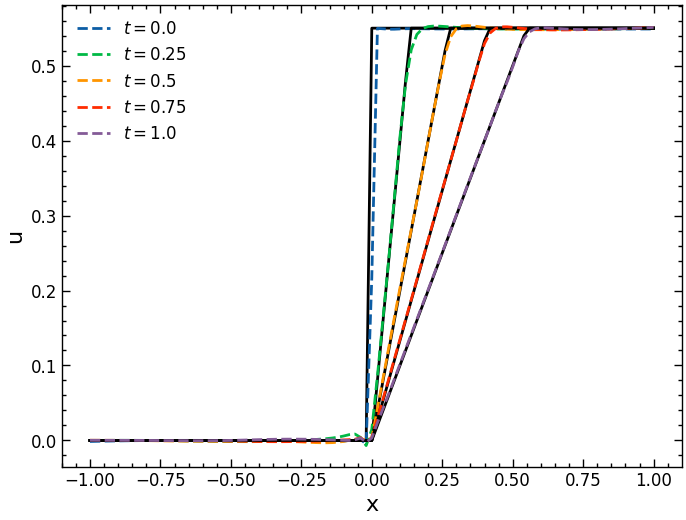

0.575 stopped at epoch: 0 | gpt_loss: 2.783254623413086,rMAE: [0.5287629961967468], rRMSE:[0.620856523513794], 0.07413769513368607, 0.09032254666090012, 0.18058915436267853, 0.0
0.575 stopped at epoch: 200 | gpt_loss: 0.0065397704020142555,rMAE: 0.056347839534282684, rRMSE:0.0851515457034111, 0.006506877951323986, 1.6985168258543126e-06, 1.5907241959212115e-06, 0.0
0.575 stopped at epoch: 400 | gpt_loss: 0.005802249535918236,rMAE: 0.039596106857061386, rRMSE:0.06228497624397278, 0.005756826605647802, 3.189565859429422e-06, 1.352711933577666e-06, 0.0
0.575 stopped at epoch: 600 | gpt_loss: 0.005123478826135397,rMAE: 0.022793758660554886, rRMSE:0.03705219179391861, 0.0050847288221120834, 2.5385816115885973e-06, 1.3364198139242944e-06, 0.0
0.575 stopped at epoch: 800 | gpt_loss: 0.004512719810009003,rMAE: 0.007686768192797899, rRMSE:0.015239051543176174, 0.004487826023250818, 1.2908777762277168e-06, 1.1985064247710397e-06, 0.0
0.575 stopped at epoch: 1000 | gpt_loss: 0.007882343605160713,

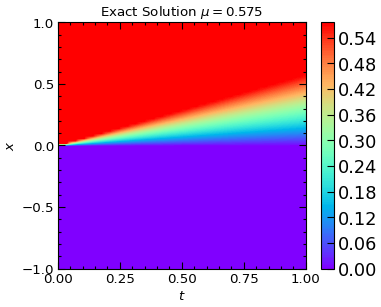

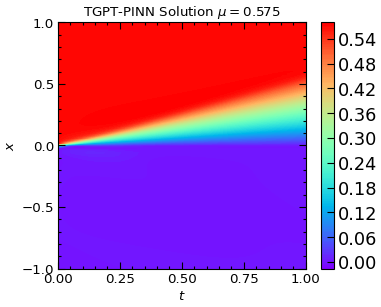

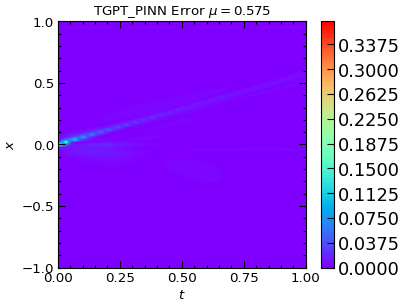

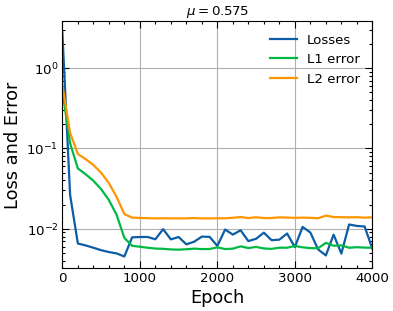

GPT-PINN at 0.575 with the Loss=0.005637314170598984, rMAE = 0.005798735190182924, rRMSE = 0.013856901787221432


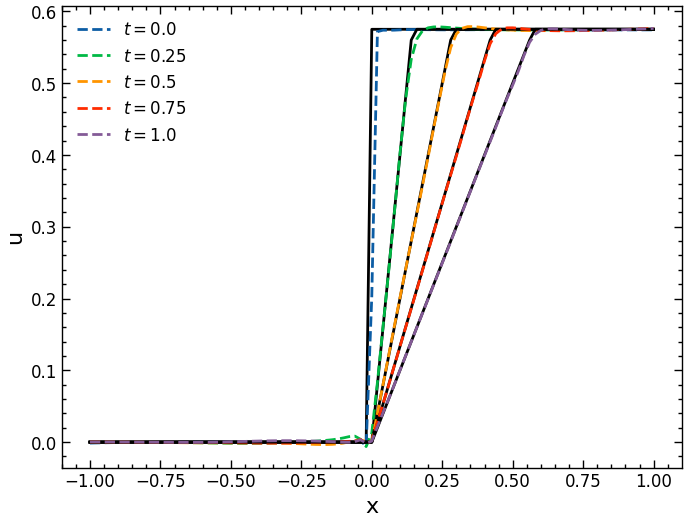

0.6 stopped at epoch: 0 | gpt_loss: 2.468282461166382,rMAE: [0.4756934940814972], rRMSE:[0.560717761516571], 0.06852436810731888, 0.08000946789979935, 0.1599663496017456, 0.0
0.6 stopped at epoch: 200 | gpt_loss: 0.006995256058871746,rMAE: 0.04946380481123924, rRMSE:0.07501498609781265, 0.006939578335732222, 4.298396106605651e-06, 1.2693574262812035e-06, 0.0
0.6 stopped at epoch: 400 | gpt_loss: 0.006077070254832506,rMAE: 0.031382977962493896, rRMSE:0.049524158239364624, 0.0060317665338516235, 3.3129977055068593e-06, 1.2173720733699156e-06, 0.0
0.6 stopped at epoch: 600 | gpt_loss: 0.005466077011078596,rMAE: 0.013196987099945545, rRMSE:0.022181279957294464, 0.005436442326754332, 1.7477165101809078e-06, 1.2157585160821327e-06, 0.0
0.6 stopped at epoch: 800 | gpt_loss: 0.008871601894497871,rMAE: 0.006272253580391407, rRMSE:0.013761834241449833, 0.008850802667438984, 1.04565731362527e-06, 1.0342446330469102e-06, 0.0
0.6 stopped at epoch: 1000 | gpt_loss: 0.00882617849856615,rMAE: 0.005836

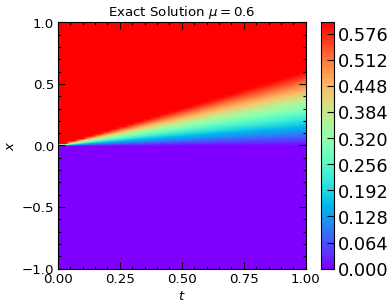

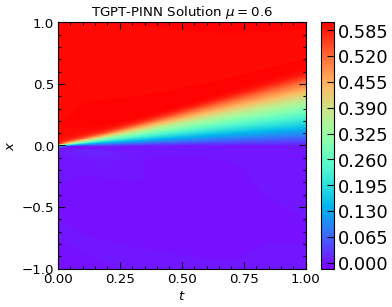

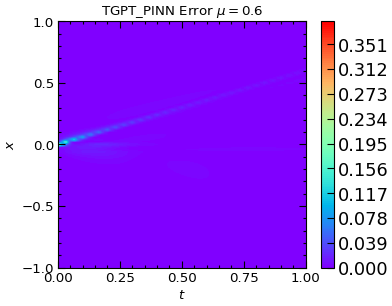

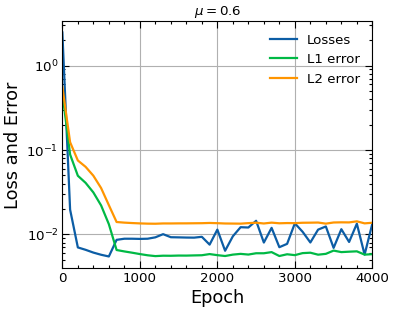

GPT-PINN at 0.6 with the Loss=0.01337810792028904, rMAE = 0.005819625686854124, rRMSE = 0.013713907450437546


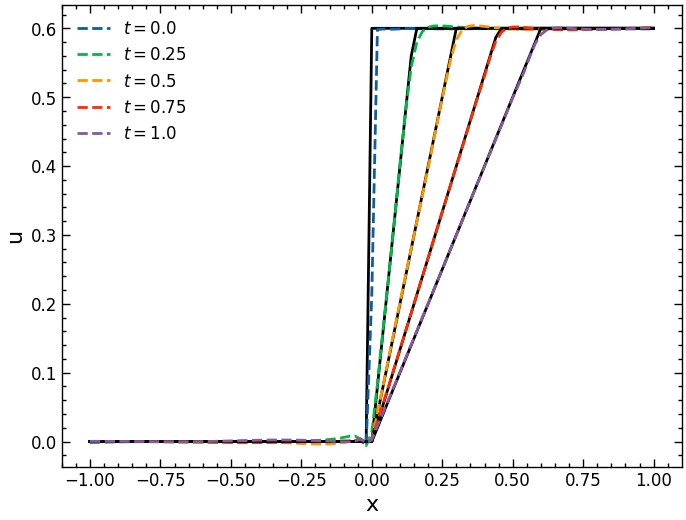

0.625 stopped at epoch: 0 | gpt_loss: 2.172523021697998,rMAE: [0.4270821809768677], rRMSE:[0.5053579211235046], 0.0633731484413147, 0.07032141834497452, 0.14059358835220337, 0.0
0.625 stopped at epoch: 200 | gpt_loss: 0.007449911441653967,rMAE: 0.043296538293361664, rRMSE:0.06570176780223846, 0.007406281307339668, 3.3384508242306765e-06, 1.0245837529510027e-06, 0.0
0.625 stopped at epoch: 400 | gpt_loss: 0.00642025750130415,rMAE: 0.022510793060064316, rRMSE:0.03566909208893776, 0.006378993857651949, 2.9868351703044027e-06, 1.1395377441658638e-06, 0.0
0.625 stopped at epoch: 600 | gpt_loss: 0.01062754075974226,rMAE: 0.006597204599529505, rRMSE:0.014002110809087753, 0.010605278424918652, 1.1645264521575882e-06, 1.0617256975820055e-06, 0.0
0.625 stopped at epoch: 800 | gpt_loss: 0.009987162426114082,rMAE: 0.006107664667069912, rRMSE:0.013590401038527489, 0.009967472404241562, 9.873029966911417e-07, 9.816611736823688e-07, 0.0
0.625 stopped at epoch: 1000 | gpt_loss: 0.01008081529289484,rMA

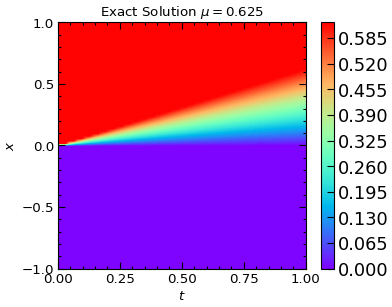

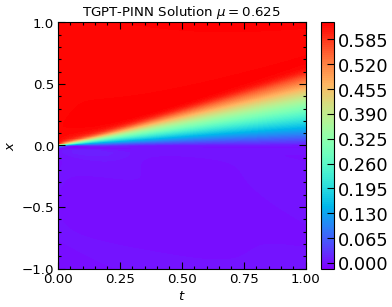

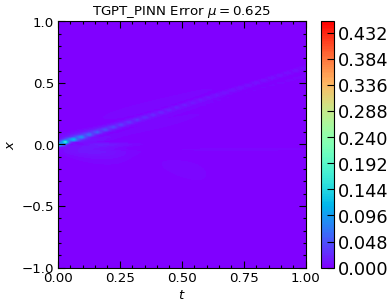

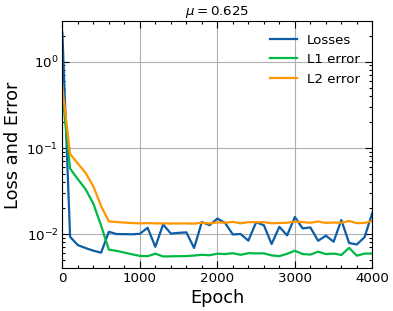

GPT-PINN at 0.625 with the Loss=0.017717327922582626, rMAE = 0.005944539792835712, rRMSE = 0.014146044850349426


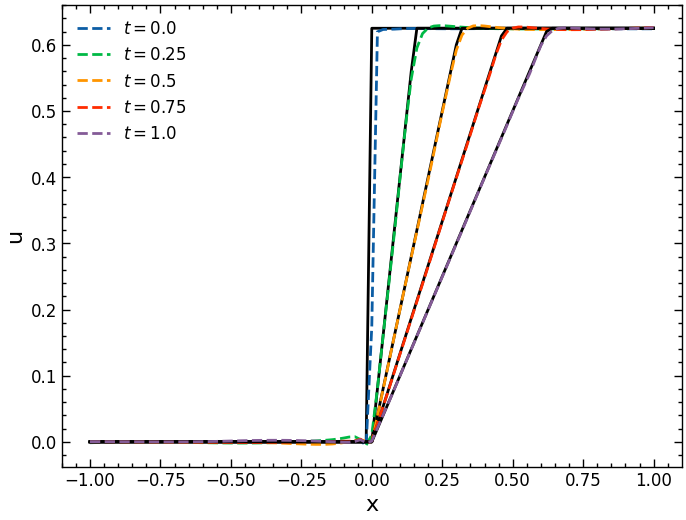

0.65 stopped at epoch: 0 | gpt_loss: 1.895975947380066,rMAE: [0.38236457109451294], rRMSE:[0.45414870977401733], 0.05868402123451233, 0.06125836819410324, 0.12247083336114883, 0.0
0.65 stopped at epoch: 200 | gpt_loss: 0.007868089713156223,rMAE: 0.03644927591085434, rRMSE:0.05539591982960701, 0.007822140119969845, 3.6355634165374795e-06, 9.594378980182228e-07, 0.0
0.65 stopped at epoch: 400 | gpt_loss: 0.006844867020845413,rMAE: 0.01331416703760624, rRMSE:0.022024452686309814, 0.006810646504163742, 2.304452664247947e-06, 1.1176124417033861e-06, 0.0
0.65 stopped at epoch: 600 | gpt_loss: 0.011268394067883492,rMAE: 0.006489207968115807, rRMSE:0.01384455244988203, 0.011247335933148861, 1.1252511740167392e-06, 9.806066145756631e-07, 0.0
0.65 stopped at epoch: 800 | gpt_loss: 0.011219239793717861,rMAE: 0.0057786600664258, rRMSE:0.013370557688176632, 0.011201033368706703, 9.052477025761618e-07, 9.153739028988639e-07, 0.0
0.65 stopped at epoch: 1000 | gpt_loss: 0.012446451000869274,rMAE: 0.00

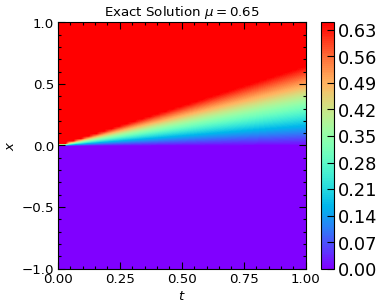

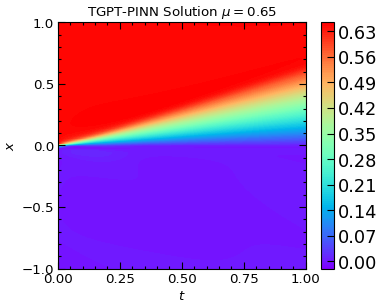

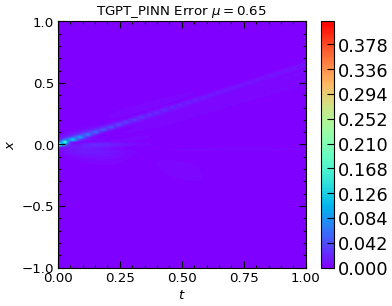

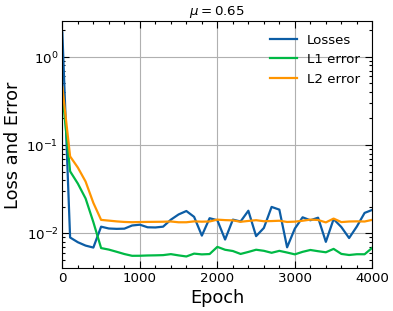

GPT-PINN at 0.65 with the Loss=0.018342385068535805, rMAE = 0.00681650685146451, rRMSE = 0.01413371879607439


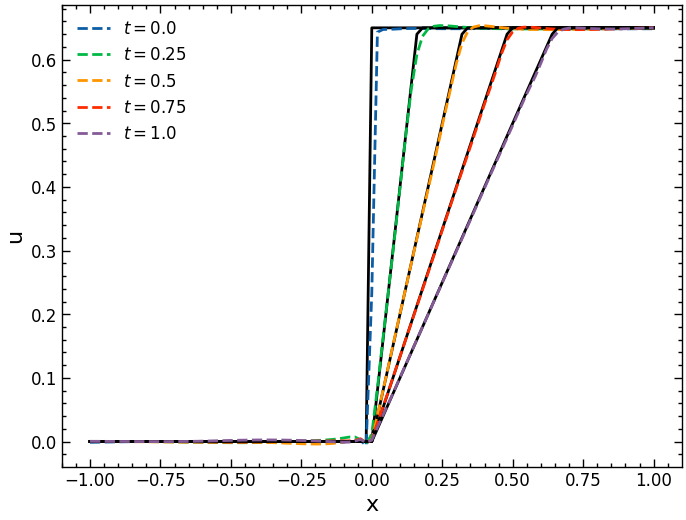

0.675 stopped at epoch: 0 | gpt_loss: 1.6386404037475586,rMAE: [0.3410676121711731], rRMSE:[0.40669354796409607], 0.054456986486911774, 0.052820298820734024, 0.10559803992509842, 0.0
0.675 stopped at epoch: 200 | gpt_loss: 0.008254211395978928,rMAE: 0.029049647971987724, rRMSE:0.04420866444706917, 0.008205349557101727, 3.997314252046635e-06, 8.888519573702069e-07, 0.0
0.675 stopped at epoch: 400 | gpt_loss: 0.012700878083705902,rMAE: 0.00695157703012228, rRMSE:0.01430748775601387, 0.012678141705691814, 1.2565564020405873e-06, 1.0170538189413492e-06, 0.0
0.675 stopped at epoch: 600 | gpt_loss: 0.012468768283724785,rMAE: 0.006160928402096033, rRMSE:0.013561336323618889, 0.012449639849364758, 1.0154634537684615e-06, 8.974159868557763e-07, 0.0
0.675 stopped at epoch: 800 | gpt_loss: 0.017784755676984787,rMAE: 0.005653990898281336, rRMSE:0.01338136289268732, 0.017765279859304428, 1.0612567393764039e-06, 8.864102483130409e-07, 0.0
0.675 stopped at epoch: 1000 | gpt_loss: 0.013259273022413254

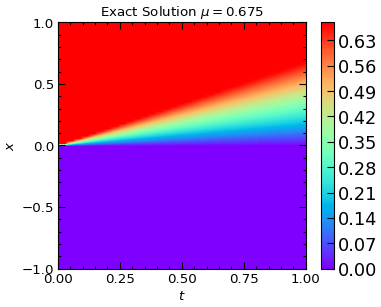

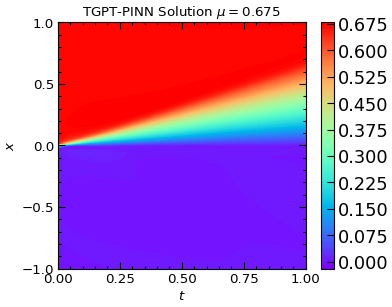

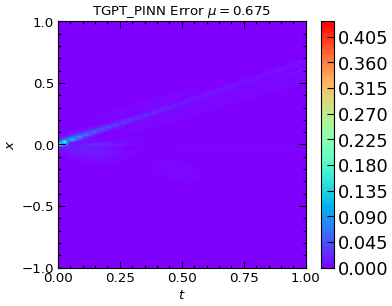

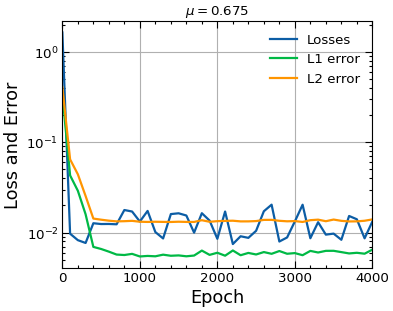

GPT-PINN at 0.675 with the Loss=0.01325010135769844, rMAE = 0.006483413279056549, rRMSE = 0.013996774330735207


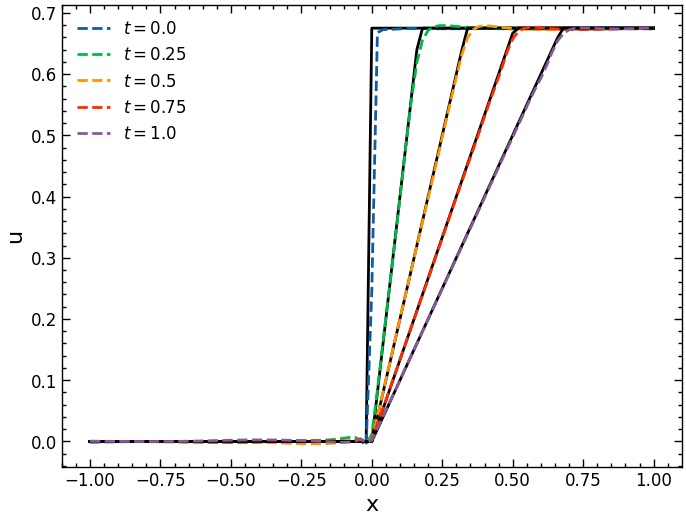

0.7 stopped at epoch: 0 | gpt_loss: 1.400517463684082,rMAE: [0.3028659522533417], rRMSE:[0.36251595616340637], 0.05069204792380333, 0.04500724747776985, 0.08997529000043869, 0.0
0.7 stopped at epoch: 200 | gpt_loss: 0.008748672902584076,rMAE: 0.021361254155635834, rRMSE:0.032699353992938995, 0.008702131919562817, 3.7796157812408637e-06, 8.744974593355437e-07, 0.0
0.7 stopped at epoch: 400 | gpt_loss: 0.013903820887207985,rMAE: 0.006713527720421553, rRMSE:0.013939552009105682, 0.01388271152973175, 1.2084858553862432e-06, 9.024363976095628e-07, 0.0
0.7 stopped at epoch: 600 | gpt_loss: 0.013955647125840187,rMAE: 0.005650219973176718, rRMSE:0.013214637525379658, 0.01393849402666092, 8.901162118490902e-07, 8.252354746218771e-07, 0.0
0.7 stopped at epoch: 800 | gpt_loss: 0.014952940866351128,rMAE: 0.005574248265475035, rRMSE:0.013296568766236305, 0.014935633167624474, 9.106722700380487e-07, 8.201250807360339e-07, 0.0
0.7 stopped at epoch: 1000 | gpt_loss: 0.014251144602894783,rMAE: 0.005591

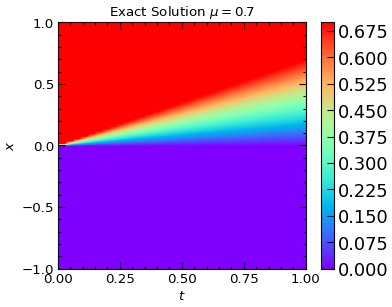

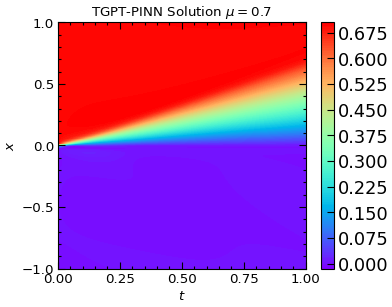

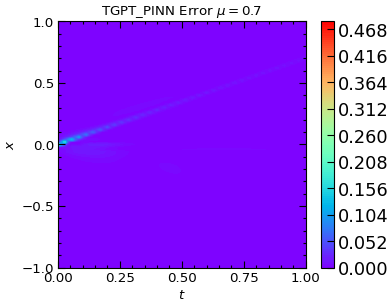

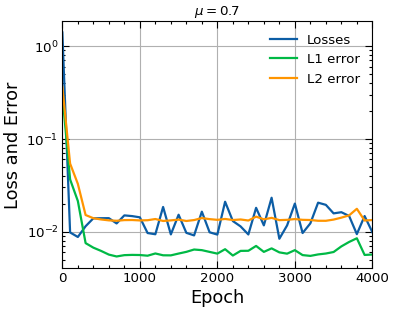

GPT-PINN at 0.7 with the Loss=0.009860150516033173, rMAE = 0.0056582908146083355, rRMSE = 0.013320520520210266


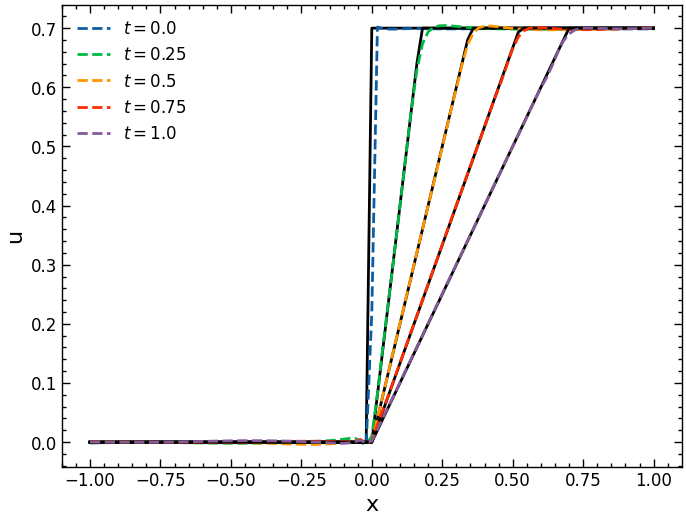

0.725 stopped at epoch: 0 | gpt_loss: 1.1816058158874512,rMAE: [0.2674574553966522], rRMSE:[0.3213125765323639], 0.0473892018198967, 0.03781917691230774, 0.07560249418020248, 0.0
0.725 stopped at epoch: 200 | gpt_loss: 0.009351369924843311,rMAE: 0.013574938289821148, rRMSE:0.02180519513785839, 0.009312273003160954, 3.0310841339087347e-06, 8.786388434600667e-07, 0.0
0.725 stopped at epoch: 400 | gpt_loss: 0.015349362976849079,rMAE: 0.0062800077721476555, rRMSE:0.01354507077485323, 0.01533089391887188, 1.0477484693183214e-06, 7.991517350092181e-07, 0.0
0.725 stopped at epoch: 600 | gpt_loss: 0.020408840849995613,rMAE: 0.005500836297869682, rRMSE:0.013224995695054531, 0.020392337813973427, 8.38472374198318e-07, 8.117672223306727e-07, 0.0
0.725 stopped at epoch: 800 | gpt_loss: 0.017366904765367508,rMAE: 0.005270976573228836, rRMSE:0.013095770962536335, 0.017351239919662476, 7.898956937424373e-07, 7.766135468045832e-07, 0.0
0.725 stopped at epoch: 1000 | gpt_loss: 0.010153076611459255,rMAE

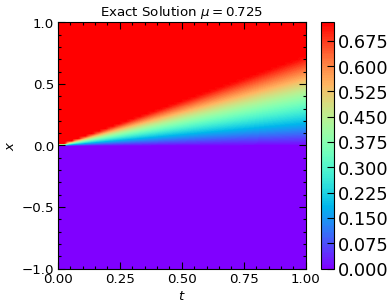

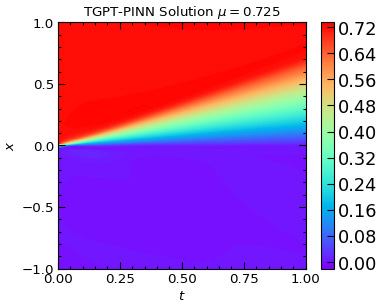

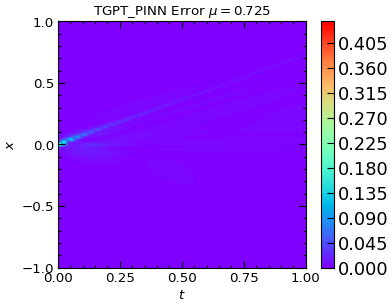

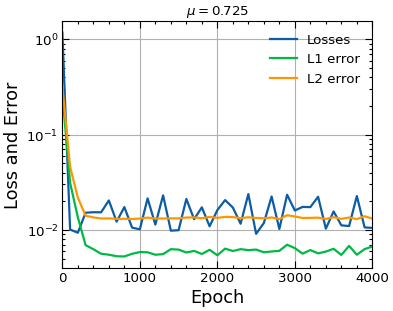

GPT-PINN at 0.725 with the Loss=0.010509499348700047, rMAE = 0.0067152585834264755, rRMSE = 0.013155614957213402


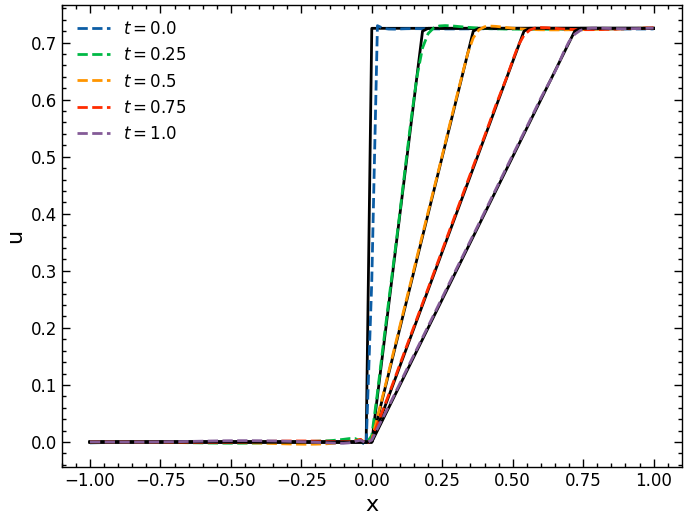

0.75 stopped at epoch: 0 | gpt_loss: 0.9819071292877197,rMAE: [0.2345784306526184], rRMSE:[0.2827911078929901], 0.044548459351062775, 0.03125612810254097, 0.062479738146066666, 0.0
0.75 stopped at epoch: 200 | gpt_loss: 0.015946732833981514,rMAE: 0.007220176979899406, rRMSE:0.01468107383698225, 0.01591508276760578, 2.405188070042641e-06, 7.599019227200188e-07, 0.0
0.75 stopped at epoch: 400 | gpt_loss: 0.016929330304265022,rMAE: 0.005643061827868223, rRMSE:0.013178369961678982, 0.016914181411266327, 8.320773758896394e-07, 6.827797847108741e-07, 0.0
0.75 stopped at epoch: 600 | gpt_loss: 0.014095781370997429,rMAE: 0.00541861355304718, rRMSE:0.013086116872727871, 0.014079485088586807, 9.494760888628662e-07, 6.801605536566058e-07, 0.0
0.75 stopped at epoch: 800 | gpt_loss: 0.012179043143987656,rMAE: 0.005742885172367096, rRMSE:0.013357043266296387, 0.012164760380983353, 7.738535146017966e-07, 6.544444204337196e-07, 0.0
0.75 stopped at epoch: 1000 | gpt_loss: 0.024870429188013077,rMAE: 0.0

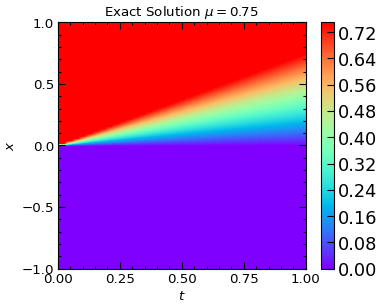

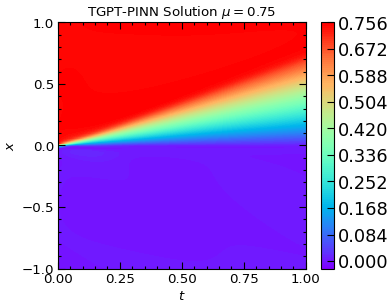

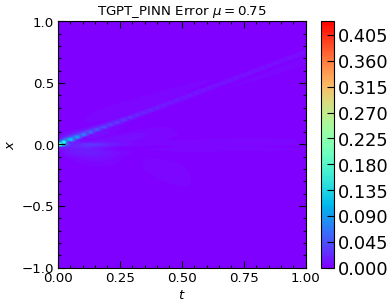

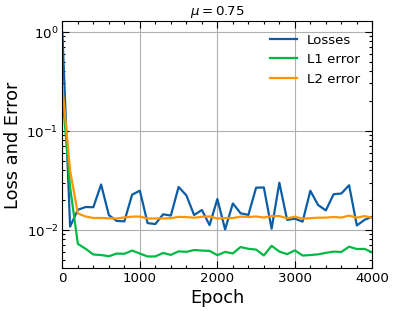

GPT-PINN at 0.75 with the Loss=0.013599812984466553, rMAE = 0.005925132893025875, rRMSE = 0.013221481814980507


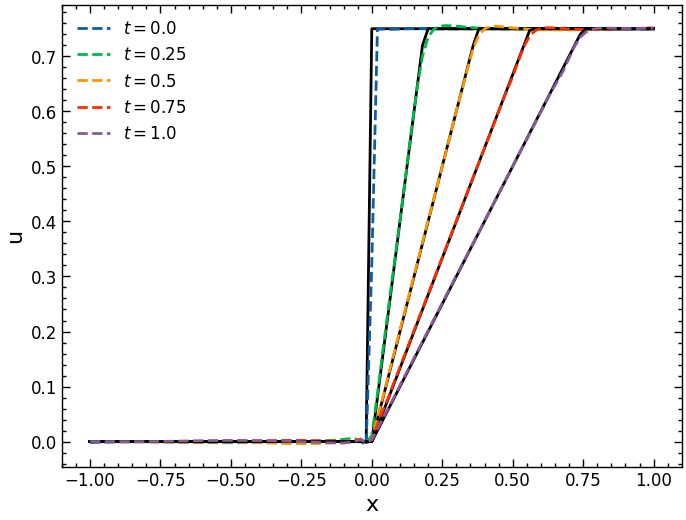

0.775 stopped at epoch: 0 | gpt_loss: 0.8014203310012817,rMAE: [0.2039620280265808], rRMSE:[0.24669015407562256], 0.04216981306672096, 0.025318071246147156, 0.05060698091983795, 0.0
0.775 stopped at epoch: 200 | gpt_loss: 0.019646139815449715,rMAE: 0.006740283686667681, rRMSE:0.013889746740460396, 0.01962822489440441, 1.094285721592314e-06, 6.972715596020862e-07, 0.0
0.775 stopped at epoch: 400 | gpt_loss: 0.016861172392964363,rMAE: 0.005812135059386492, rRMSE:0.013044233433902264, 0.016846077516674995, 9.062115964297845e-07, 6.033068302713218e-07, 0.0
0.775 stopped at epoch: 600 | gpt_loss: 0.016180718317627907,rMAE: 0.005466189701110125, rRMSE:0.013116588816046715, 0.016163745895028114, 1.109272147914453e-06, 5.88050852456945e-07, 0.0
0.775 stopped at epoch: 800 | gpt_loss: 0.029682621359825134,rMAE: 0.005597619339823723, rRMSE:0.013099368661642075, 0.029661741107702255, 1.5701980373705737e-06, 5.178441142561496e-07, 0.0
0.775 stopped at epoch: 1000 | gpt_loss: 0.011173251084983349,r

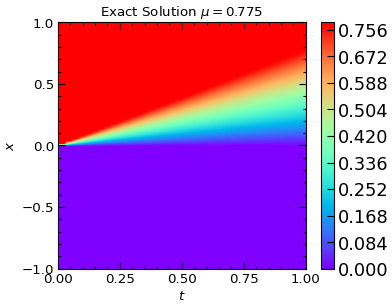

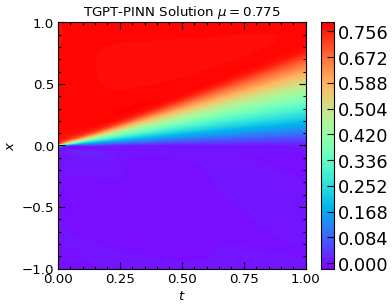

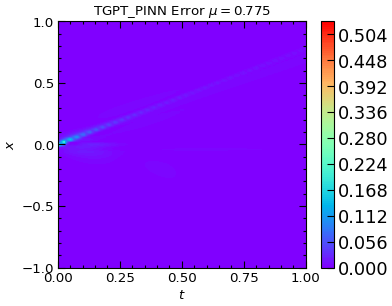

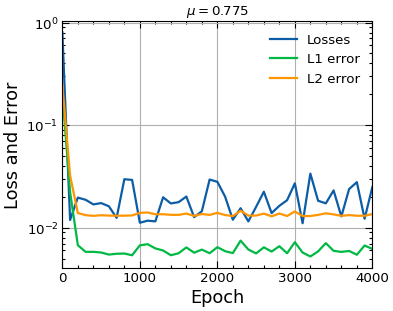

GPT-PINN at 0.775 with the Loss=0.02492568828165531, rMAE = 0.006207464728504419, rRMSE = 0.01357724517583847


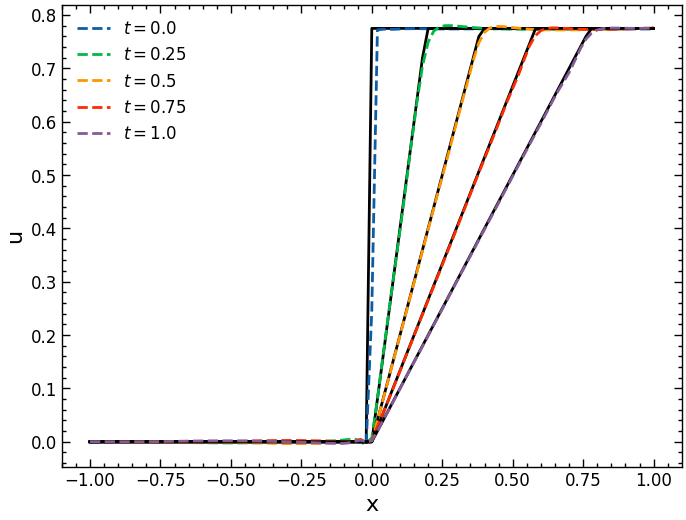

0.8 stopped at epoch: 0 | gpt_loss: 0.6401452422142029,rMAE: [0.17537930607795715], rRMSE:[0.21277517080307007], 0.040253255516290665, 0.020005006343126297, 0.039984188973903656, 0.0
0.8 stopped at epoch: 200 | gpt_loss: 0.020468013361096382,rMAE: 0.006213742308318615, rRMSE:0.013525201939046383, 0.020452458411455154, 9.498664894636022e-07, 6.056370693841018e-07, 0.0
0.8 stopped at epoch: 400 | gpt_loss: 0.027062922716140747,rMAE: 0.005865404848009348, rRMSE:0.013505893759429455, 0.027046730741858482, 9.618851208870183e-07, 6.572971074092493e-07, 0.0
0.8 stopped at epoch: 600 | gpt_loss: 0.016742423176765442,rMAE: 0.007053151726722717, rRMSE:0.01346347015351057, 0.016719521954655647, 1.750065393935074e-06, 5.400385134635144e-07, 0.0
0.8 stopped at epoch: 800 | gpt_loss: 0.016772137954831123,rMAE: 0.005716628395020962, rRMSE:0.012968029826879501, 0.016758333891630173, 7.889774451541598e-07, 5.915218252994237e-07, 0.0
0.8 stopped at epoch: 1000 | gpt_loss: 0.03252539411187172,rMAE: 0.005

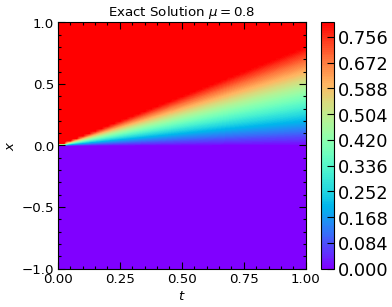

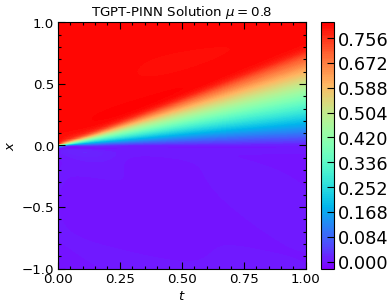

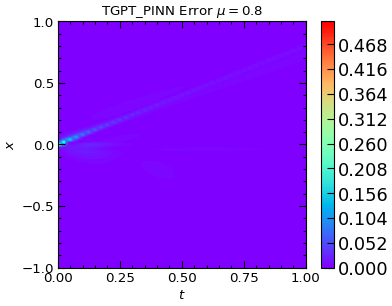

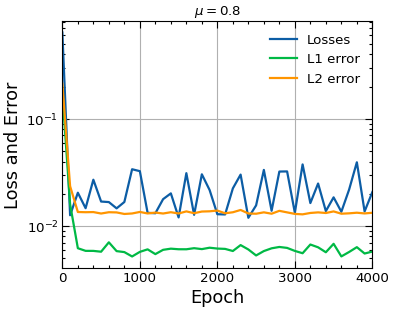

GPT-PINN at 0.8 with the Loss=0.020740894600749016, rMAE = 0.00578192388638854, rRMSE = 0.013307345099747181


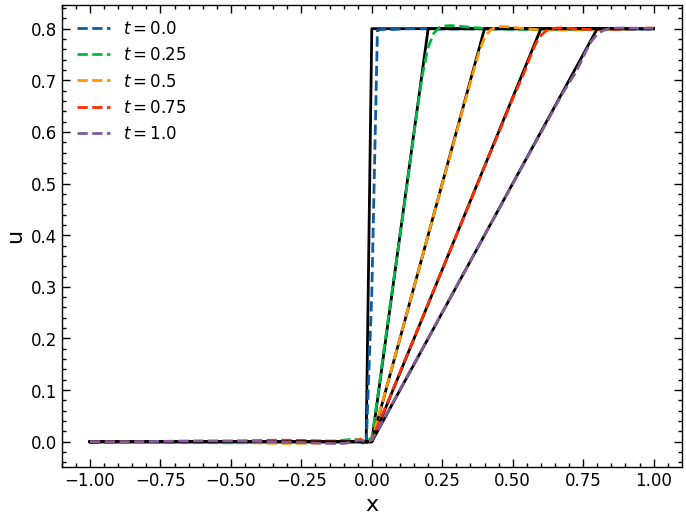

0.825 stopped at epoch: 0 | gpt_loss: 0.49808257818222046,rMAE: [0.14866413176059723], rRMSE:[0.18085238337516785], 0.03879880532622337, 0.015316951088607311, 0.030611427500844002, 0.0
0.825 stopped at epoch: 200 | gpt_loss: 0.019595835357904434,rMAE: 0.005410807207226753, rRMSE:0.012984175235033035, 0.019582044333219528, 7.991212669367087e-07, 5.799143991680467e-07, 0.0
0.825 stopped at epoch: 400 | gpt_loss: 0.01729421131312847,rMAE: 0.006423093378543854, rRMSE:0.013552323915064335, 0.0172566045075655, 3.008306975971209e-06, 7.524097327404888e-07, 0.0
0.825 stopped at epoch: 600 | gpt_loss: 0.03405802696943283,rMAE: 0.0053076366893947124, rRMSE:0.01308188121765852, 0.034042686223983765, 8.075300570453692e-07, 7.267099135788158e-07, 0.0
0.825 stopped at epoch: 800 | gpt_loss: 0.03571160510182381,rMAE: 0.005635958164930344, rRMSE:0.013239443302154541, 0.03569426015019417, 1.1087018947364413e-06, 6.257678819565626e-07, 0.0
0.825 stopped at epoch: 1000 | gpt_loss: 0.035361580550670624,rM

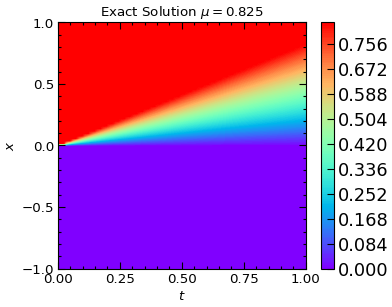

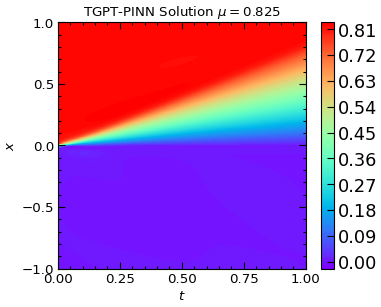

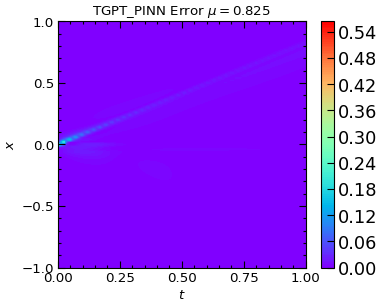

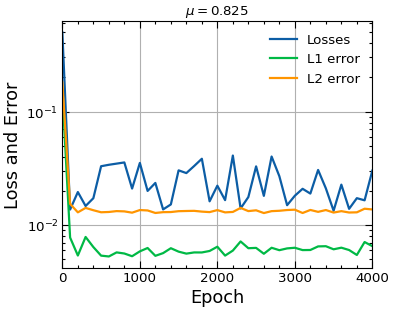

GPT-PINN at 0.825 with the Loss=0.030271921306848526, rMAE = 0.006540998350828886, rRMSE = 0.01376485824584961


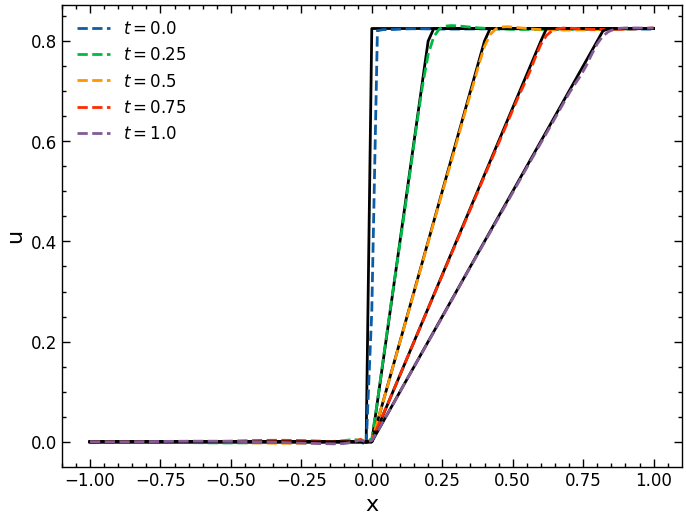

0.85 stopped at epoch: 0 | gpt_loss: 0.3752317726612091,rMAE: [0.12369290739297867], rRMSE:[0.15077237784862518], 0.0378064401447773, 0.011253885924816132, 0.02248864434659481, 0.0
0.85 stopped at epoch: 200 | gpt_loss: 0.017271138727664948,rMAE: 0.005161373410373926, rRMSE:0.012856779620051384, 0.01725558377802372, 8.956332635534636e-07, 6.599332778023381e-07, 0.0
0.85 stopped at epoch: 400 | gpt_loss: 0.025592336431145668,rMAE: 0.006163329817354679, rRMSE:0.012901139445602894, 0.025572655722498894, 1.2109056797271478e-06, 7.572329536742473e-07, 0.0
0.85 stopped at epoch: 600 | gpt_loss: 0.03967274725437164,rMAE: 0.0055595324374735355, rRMSE:0.013062993995845318, 0.039652638137340546, 1.368580001326336e-06, 6.42496274849691e-07, 0.0
0.85 stopped at epoch: 800 | gpt_loss: 0.030706966295838356,rMAE: 0.00613747350871563, rRMSE:0.013348385691642761, 0.03068743273615837, 1.2435292546797427e-06, 7.098494734236738e-07, 0.0
0.85 stopped at epoch: 1000 | gpt_loss: 0.020192576572299004,rMAE: 0.

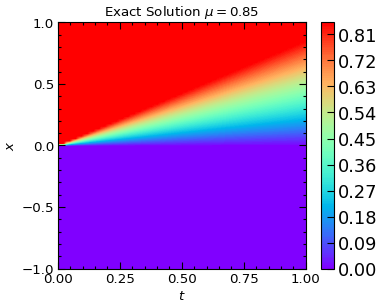

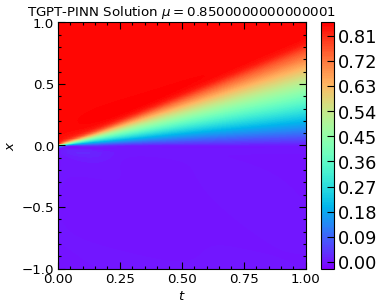

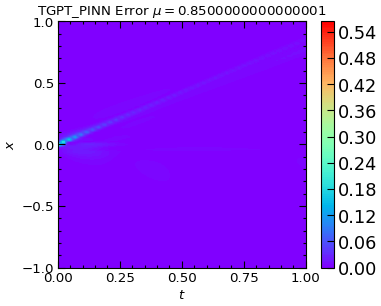

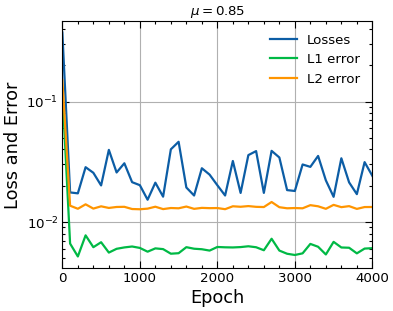

GPT-PINN at 0.8500000000000001 with the Loss=0.024136679247021675, rMAE = 0.006049568764865398, rRMSE = 0.013301939703524113


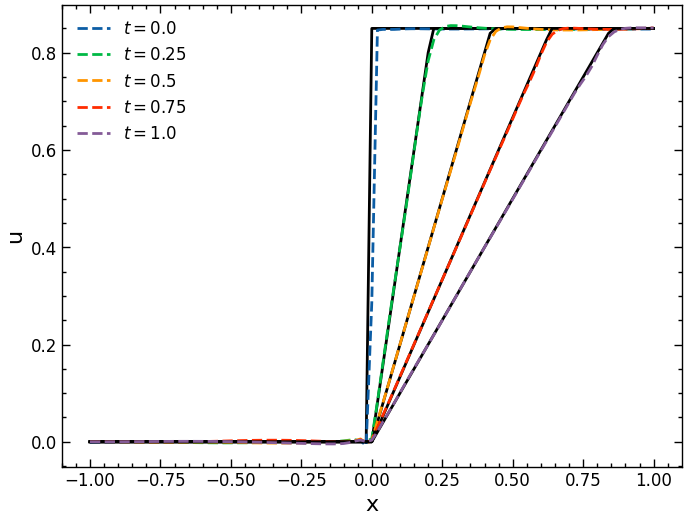

0.875 stopped at epoch: 0 | gpt_loss: 0.27159327268600464,rMAE: [0.10036973655223846], rRMSE:[0.12237947434186935], 0.03727617487311363, 0.0078158313408494, 0.015615878626704216, 0.0
0.875 stopped at epoch: 200 | gpt_loss: 0.03100026771426201,rMAE: 0.0054426295682787895, rRMSE:0.0129380002617836, 0.030978143215179443, 1.407468516845256e-06, 8.049581765590119e-07, 0.0
0.875 stopped at epoch: 400 | gpt_loss: 0.015828827396035194,rMAE: 0.008636018261313438, rRMSE:0.014913336373865604, 0.015810735523700714, 1.2344205515546491e-06, 5.74680029785668e-07, 0.0
0.875 stopped at epoch: 600 | gpt_loss: 0.016918785870075226,rMAE: 0.006606788374483585, rRMSE:0.013819064944982529, 0.016901379451155663, 9.839734502747888e-07, 7.566122803837061e-07, 0.0
0.875 stopped at epoch: 800 | gpt_loss: 0.024700110778212547,rMAE: 0.007280736695975065, rRMSE:0.013577092438936234, 0.02464534342288971, 3.5715929698199034e-06, 1.9051303752348758e-06, 0.0
0.875 stopped at epoch: 1000 | gpt_loss: 0.0451611690223217,rM

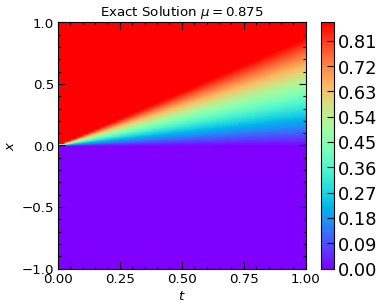

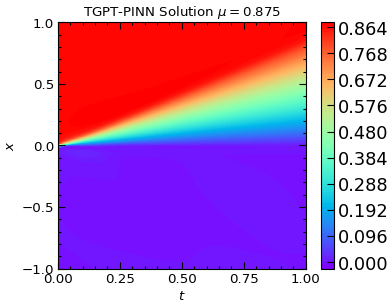

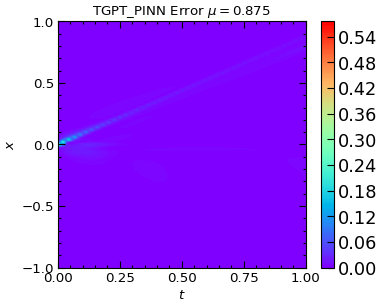

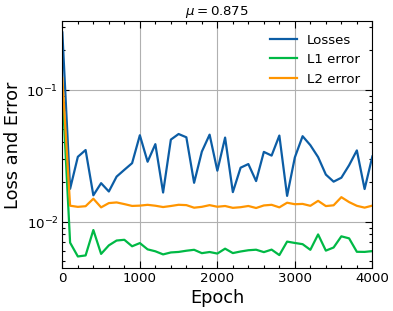

GPT-PINN at 0.875 with the Loss=0.03117806278169155, rMAE = 0.005978244822472334, rRMSE = 0.013221418485045433


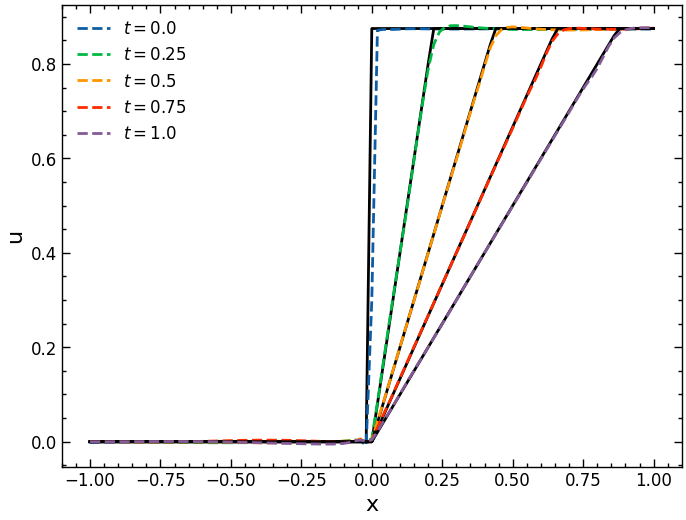

0.9 stopped at epoch: 0 | gpt_loss: 0.18716686964035034,rMAE: [0.07857726514339447], rRMSE:[0.0955614224076271], 0.03720800578594208, 0.0050027742981910706, 0.009993111714720726, 0.0
0.9 stopped at epoch: 200 | gpt_loss: 0.017470708116889,rMAE: 0.00582700502127409, rRMSE:0.0129479318857193, 0.01745431497693062, 8.269853424280882e-07, 8.123189445541357e-07, 0.0
0.9 stopped at epoch: 400 | gpt_loss: 0.04346421733498573,rMAE: 0.00532310176640749, rRMSE:0.012837582267820835, 0.04344474896788597, 7.502653716073837e-07, 1.1967283626290737e-06, 0.0
0.9 stopped at epoch: 600 | gpt_loss: 0.021176816895604134,rMAE: 0.00572382565587759, rRMSE:0.012794241309165955, 0.021159734576940536, 9.403041190125805e-07, 7.679648774683301e-07, 0.0
0.9 stopped at epoch: 800 | gpt_loss: 0.03700605034828186,rMAE: 0.00602386612445116, rRMSE:0.013483762741088867, 0.03698667883872986, 7.358321454375982e-07, 1.2011773833364714e-06, 0.0
0.9 stopped at epoch: 1000 | gpt_loss: 0.03739609941840172,rMAE: 0.00560143869370

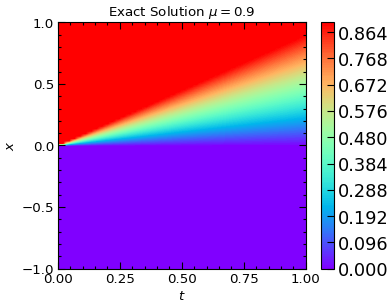

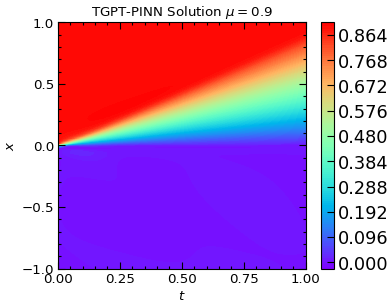

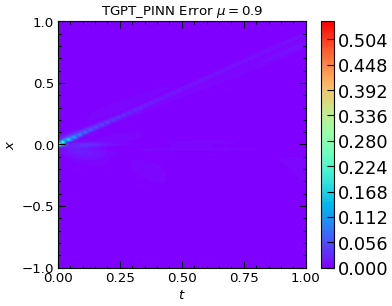

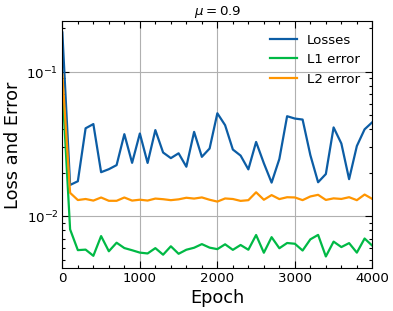

GPT-PINN at 0.9 with the Loss=0.044812798500061035, rMAE = 0.00625113770365715, rRMSE = 0.013174992986023426


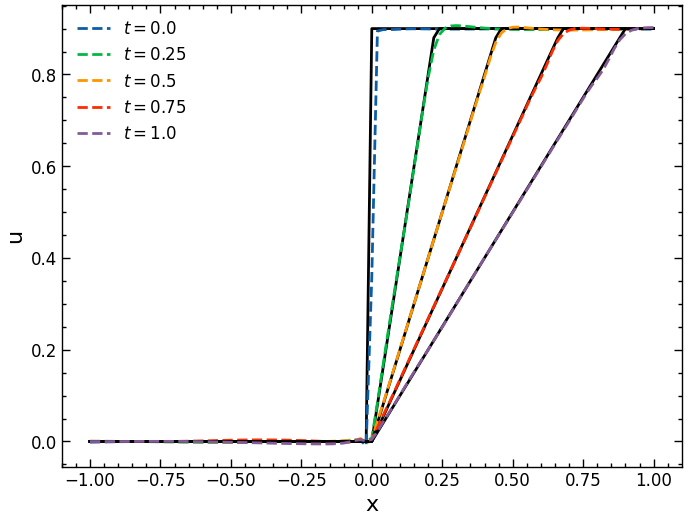

0.925 stopped at epoch: 0 | gpt_loss: 0.12195239961147308,rMAE: [0.058128293603658676], rRMSE:[0.07026111334562302], 0.037601929157972336, 0.002814712468534708, 0.005620333831757307, 0.0
0.925 stopped at epoch: 200 | gpt_loss: 0.027738044038414955,rMAE: 0.005873244721442461, rRMSE:0.01324840821325779, 0.027723539620637894, 8.615011779511406e-07, 5.890148031539866e-07, 0.0
0.925 stopped at epoch: 400 | gpt_loss: 0.03405574709177017,rMAE: 0.005754484795033932, rRMSE:0.013121047057211399, 0.034030742943286896, 1.9692643036250956e-06, 5.310982373885054e-07, 0.0
0.925 stopped at epoch: 600 | gpt_loss: 0.021223431453108788,rMAE: 0.006268477067351341, rRMSE:0.013047950342297554, 0.02120138332247734, 1.6622556131551391e-06, 5.425830522653996e-07, 0.0
0.925 stopped at epoch: 800 | gpt_loss: 0.041054267436265945,rMAE: 0.006035770755261183, rRMSE:0.01334314700216055, 0.041033271700143814, 9.791347110876814e-07, 1.1204821248611552e-06, 0.0
0.925 stopped at epoch: 1000 | gpt_loss: 0.019450984895229

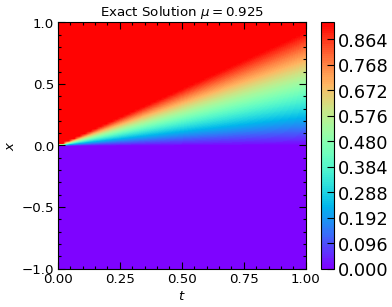

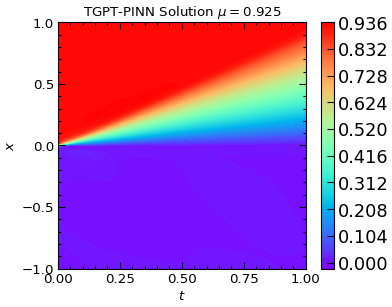

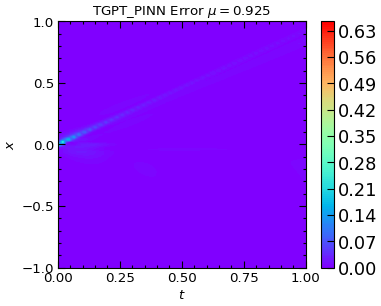

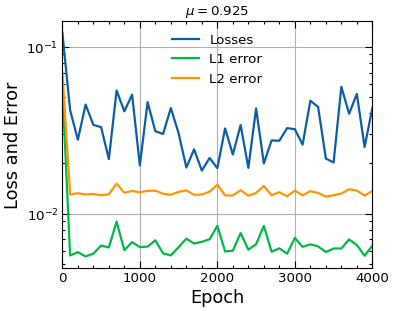

GPT-PINN at 0.925 with the Loss=0.042932238429784775, rMAE = 0.006428558379411697, rRMSE = 0.01367475837469101


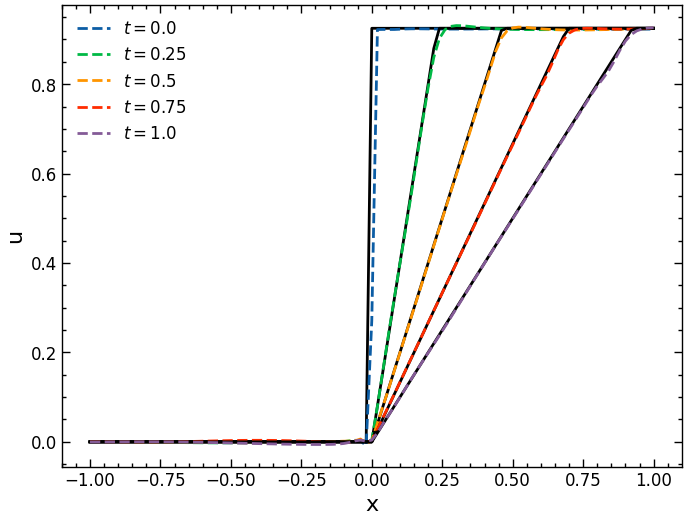

0.95 stopped at epoch: 0 | gpt_loss: 0.07595014572143555,rMAE: [0.038906924426555634], rRMSE:[0.046565473079681396], 0.038457948714494705, 0.0012516549322754145, 0.0024975647684186697, 0.0
0.95 stopped at epoch: 200 | gpt_loss: 0.02839711681008339,rMAE: 0.00575924851000309, rRMSE:0.013027959503233433, 0.028385182842612267, 6.346709255922178e-07, 5.587140776697197e-07, 0.0
0.95 stopped at epoch: 400 | gpt_loss: 0.02197057381272316,rMAE: 0.007262076251208782, rRMSE:0.01345793530344963, 0.021945809945464134, 9.057987995220174e-07, 1.5705004443589132e-06, 0.0
0.95 stopped at epoch: 600 | gpt_loss: 0.023847997188568115,rMAE: 0.006885469891130924, rRMSE:0.013370608910918236, 0.02382870763540268, 1.102960595744662e-06, 8.259042374447745e-07, 0.0
0.95 stopped at epoch: 800 | gpt_loss: 0.02830924093723297,rMAE: 0.006052006967365742, rRMSE:0.013006390072405338, 0.028284389525651932, 1.96424684872909e-06, 5.208582933846628e-07, 0.0
0.95 stopped at epoch: 1000 | gpt_loss: 0.05991589277982712,rMAE:

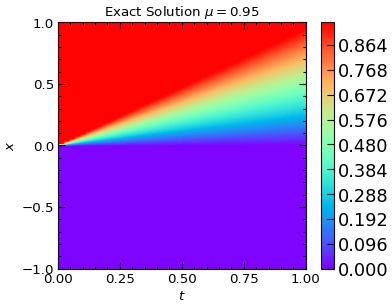

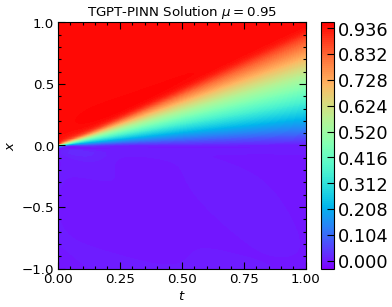

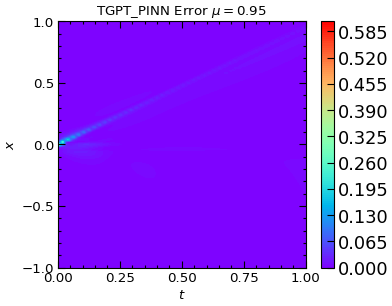

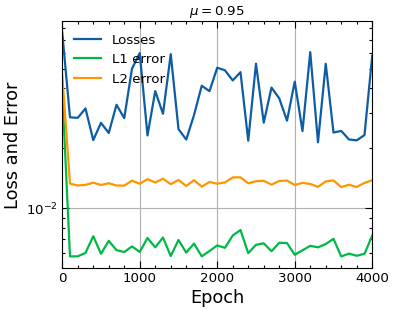

GPT-PINN at 0.95 with the Loss=0.058034658432006836, rMAE = 0.007305862847715616, rRMSE = 0.013826836831867695


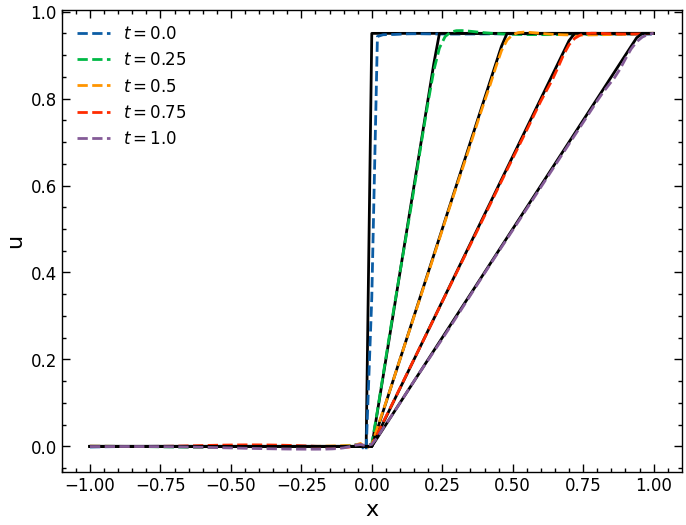

0.975 stopped at epoch: 0 | gpt_loss: 0.04915992170572281,rMAE: [0.020991697907447815], rRMSE:[0.025278789922595024], 0.039776068180799484, 0.0003135948209092021, 0.0006247904966585338, 0.0
0.975 stopped at epoch: 200 | gpt_loss: 0.032381270080804825,rMAE: 0.005922784097492695, rRMSE:0.013285418041050434, 0.03237011656165123, 5.716462396776478e-07, 5.436966148408828e-07, 0.0
0.975 stopped at epoch: 400 | gpt_loss: 0.0493699349462986,rMAE: 0.006941461469978094, rRMSE:0.01402297429740429, 0.049351077526807785, 1.2665879012274672e-06, 6.190915655679419e-07, 0.0
0.975 stopped at epoch: 600 | gpt_loss: 0.05486352741718292,rMAE: 0.0064313411712646484, rRMSE:0.013585975393652916, 0.054840583354234695, 1.6088858956209151e-06, 6.854031653347192e-07, 0.0
0.975 stopped at epoch: 800 | gpt_loss: 0.05954655632376671,rMAE: 0.0061080362647771835, rRMSE:0.01361718587577343, 0.05951850116252899, 1.8217425576949609e-06, 9.839110362008796e-07, 0.0
0.975 stopped at epoch: 1000 | gpt_loss: 0.04495497420430

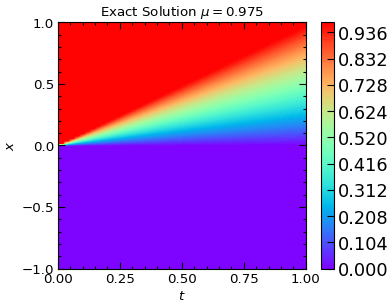

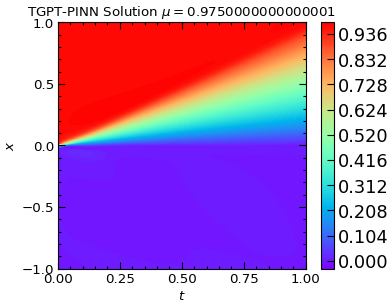

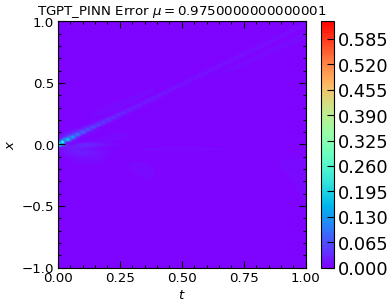

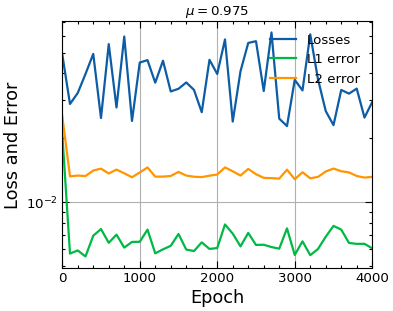

GPT-PINN at 0.9750000000000001 with the Loss=0.0293732862919569, rMAE = 0.006059193052351475, rRMSE = 0.013102203607559204


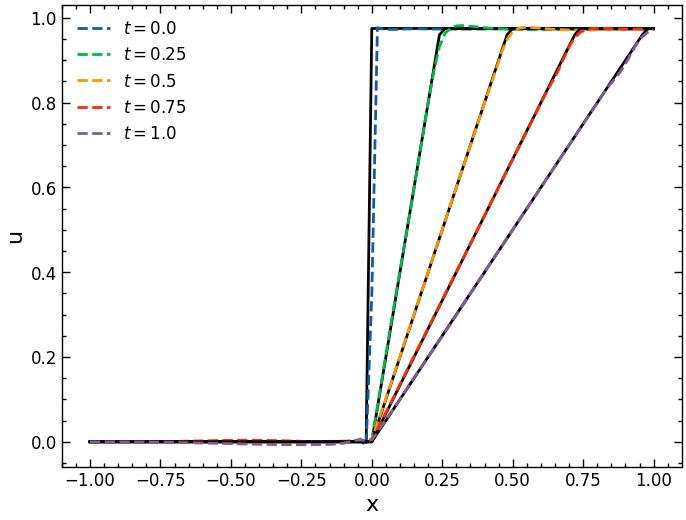

1.0 stopped at epoch: 0 | gpt_loss: 0.04158184304833412,rMAE: [0.005661510396748781], rRMSE:[0.01357274129986763], 0.041556283831596375, 5.364091748560895e-07, 2.0196418972773245e-06, 0.0
1.0 stopped at epoch: 200 | gpt_loss: 0.036623477935791016,rMAE: 0.005976149346679449, rRMSE:0.013296689838171005, 0.03659181669354439, 6.153204594738781e-07, 2.5506903966743266e-06, 0.0
1.0 stopped at epoch: 400 | gpt_loss: 0.038495756685733795,rMAE: 0.0064059956930577755, rRMSE:0.013205460272729397, 0.03847028315067291, 5.950681156718929e-07, 1.9524647996149724e-06, 0.0
1.0 stopped at epoch: 600 | gpt_loss: 0.03937384486198425,rMAE: 0.006080671213567257, rRMSE:0.013440582901239395, 0.03931817784905434, 2.6932948458124883e-06, 2.8732929422403686e-06, 0.0
1.0 stopped at epoch: 800 | gpt_loss: 0.061615411192178726,rMAE: 0.006193411070853472, rRMSE:0.013621816411614418, 0.06155393645167351, 3.526995442371117e-06, 2.620565510369488e-06, 0.0
1.0 stopped at epoch: 1000 | gpt_loss: 0.030620431527495384,rMAE

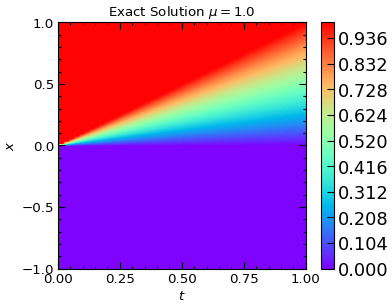

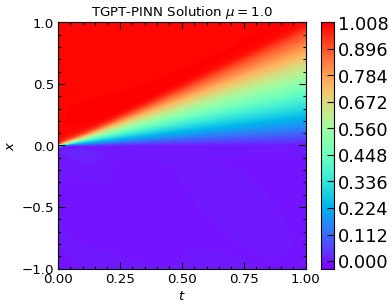

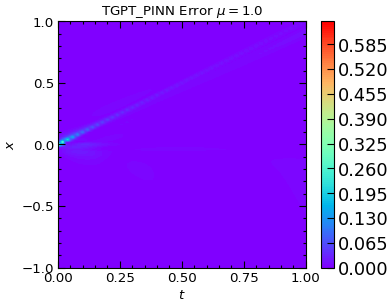

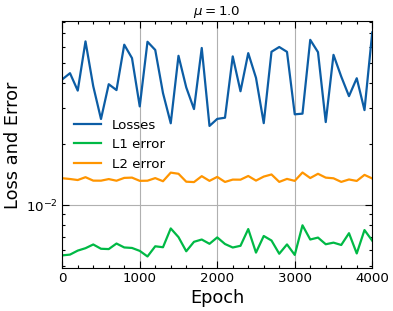

GPT-PINN at 1.0 with the Loss=0.07077408581972122, rMAE = 0.006685723550617695, rRMSE = 0.013530844822525978


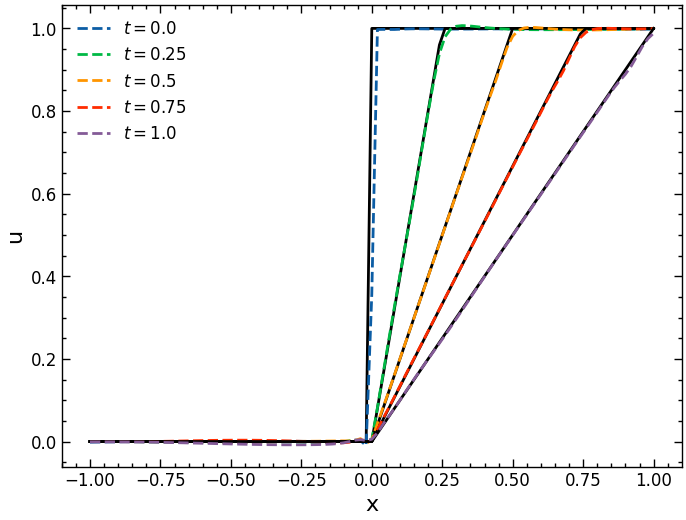

Largest Loss: 0.07077408581972122 at 1.0
Largest L1: 0.007305862847715616 at 0.95
Largest L2: 0.014146044850349426 at 0.625
Loss:[0.003699725493788719, 0.003943122923374176, 0.005333131179213524, 0.005637314170598984, 0.01337810792028904, 0.017717327922582626, 0.018342385068535805, 0.01325010135769844, 0.009860150516033173, 0.010509499348700047, 0.013599812984466553, 0.02492568828165531, 0.020740894600749016, 0.030271921306848526, 0.024136679247021675, 0.03117806278169155, 0.044812798500061035, 0.042932238429784775, 0.058034658432006836, 0.0293732862919569, 0.07077408581972122]
L1:[0.0061410823836922646, 0.006346668116748333, 0.006316869053989649, 0.005798735190182924, 0.005819625686854124, 0.005944539792835712, 0.00681650685146451, 0.006483413279056549, 0.0056582908146083355, 0.0067152585834264755, 0.005925132893025875, 0.006207464728504419, 0.00578192388638854, 0.006540998350828886, 0.006049568764865398, 0.005978244822472334, 0.00625113770365715, 0.006428558379411697, 0.0073058628477

In [6]:
i=0
layers_gpt = np.array([2, i+1, 1])
c_initial  = torch.full((1,i+1), 1/(i+1))
nu_loss = []
L1_err  = []
L2_err  = []
Cor_err =  []

gpt_train_time_1 = time.perf_counter()
for nu in nu_training:
    Exact_y0 = exact_u(nu,xt_test)[:,None]

    IC_data = create_IC_data(nu, Xi, Xf, Ti, Tf, IC_pts, IC_simple)
    IC_xt     = IC_data[0].to(device)
    IC_u      = IC_data[1].to(device)

    #print((P_list[0]).linears[0].bias)
    GPT_PINN = GPT(nu, layers_gpt, P_list[0:i+1], c_initial,xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u,  BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL,Nx_train,Nt_train,dt).to(device)

    gpt_losses = gpt_train(GPT_PINN, nu, xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u, BC1, BC2, epochs_gpt, lr_gpt, tol_gpt)

    nu_loss.append(gpt_losses[0].item())
    L1_err.append(gpt_losses[3][-1])
    L2_err.append(gpt_losses[4][-1])


    Burgers_plot(xt_test, Exact_y0, Nx_test,Nt_test,title=fr"Exact Solution $\mu={round(nu,3)}$")
    Burgers_plot(xt_test, GPT_PINN.forward(xt_test), Nx_test,Nt_test,title=fr"VGPT-PINN Solution $\mu={nu}$")
    Burgers_plot(xt_test, abs(GPT_PINN.forward(xt_test)-Exact_y0), Nx_test,Nt_test,title=fr"VGPT_PINN Error $\mu={nu}$")

    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(gpt_losses[1], gpt_losses[2], label="Losses")
    plt.plot(gpt_losses[1], gpt_losses[3], label="L1 error")
    plt.plot(gpt_losses[1], gpt_losses[4], label="L2 error")
    #plt.plot(gpt_losses[1], gpt_losses[5], label="Loss_implict")
    #plt.plot(gpt_losses[1], gpt_losses[8], label="Loss_Res")
    #plt.plot(gpt_losses[1], gpt_losses[6], label="Loss_IC")
    #plt.plot(gpt_losses[1], gpt_losses[7], label="Loss_BC")

    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    
    plt.grid(True)
    plt.xlim(0,max(gpt_losses[1]))
    plt.yscale('log')
    plt.title(fr"$\mu={round(nu,3)}$", fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    #err =exact_u_err(exact_u(nu,xt_test)[:,None],GPT_PINN(xt_test),xt_test,nu)[1]
    #Cor_err.append(err.item())
    #print(f"GPT-PINN at {nu} with the Loss={gpt_losses[0].item()}, rMAE = {gpt_losses[3][-1]}, rRMSE = {gpt_losses[4][-1]} and Cor error = {err.item()}")
    print(f"GPT-PINN at {nu} with the Loss={gpt_losses[0].item()}, rMAE = {gpt_losses[3][-1]}, rRMSE = {gpt_losses[4][-1]}")

    plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)
    for ind in range(1, Nt_test+1,50):
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),Exact_y0[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'k')
        #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),GPT_PINN.forward(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'--',label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.xlabel("x",     fontsize=16)
    plt.ylabel("u", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)

    plt.legend(fontsize = 12)#
    plt.show()
        
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 

print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")

In [7]:
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 
print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")
print(f"Error:{Cor_err}")

Largest Loss: 0.07077408581972122 at 1.0
Largest L1: 0.007305862847715616 at 0.95
Largest L2: 0.014146044850349426 at 0.625
Loss:[0.003699725493788719, 0.003943122923374176, 0.005333131179213524, 0.005637314170598984, 0.01337810792028904, 0.017717327922582626, 0.018342385068535805, 0.01325010135769844, 0.009860150516033173, 0.010509499348700047, 0.013599812984466553, 0.02492568828165531, 0.020740894600749016, 0.030271921306848526, 0.024136679247021675, 0.03117806278169155, 0.044812798500061035, 0.042932238429784775, 0.058034658432006836, 0.0293732862919569, 0.07077408581972122]
L1:[0.0061410823836922646, 0.006346668116748333, 0.006316869053989649, 0.005798735190182924, 0.005819625686854124, 0.005944539792835712, 0.00681650685146451, 0.006483413279056549, 0.0056582908146083355, 0.0067152585834264755, 0.005925132893025875, 0.006207464728504419, 0.00578192388638854, 0.006540998350828886, 0.006049568764865398, 0.005978244822472334, 0.00625113770365715, 0.006428558379411697, 0.0073058628477

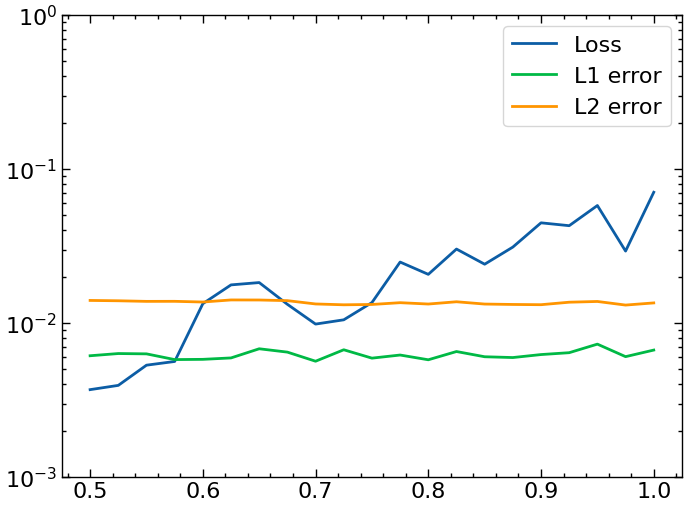

In [8]:
plt.errorbar(nu_training,nu_loss,label='Loss')
plt.errorbar(nu_training,L1_err,label='L1 error')
plt.errorbar(nu_training,L2_err,label='L2 error')
#plt.errorbar(nu_training,Cor_err,label='Cor error')
plt.legend(frameon=True)
plt.ylim(1e-3,1)
plt.yscale('log')

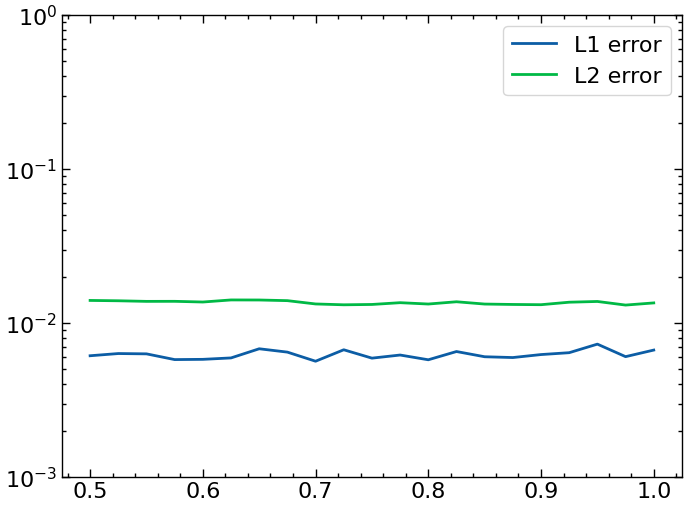

In [9]:
#plt.errorbar(nu_training,nu_loss,label='Loss')
plt.errorbar(nu_training,L1_err,label='L1 error')
plt.errorbar(nu_training,L2_err,label='L2 error')
#plt.errorbar(nu_training,Cor_err,label='Cor error')
plt.legend(frameon=True)
plt.ylim(1e-3,1)
plt.yscale('log')

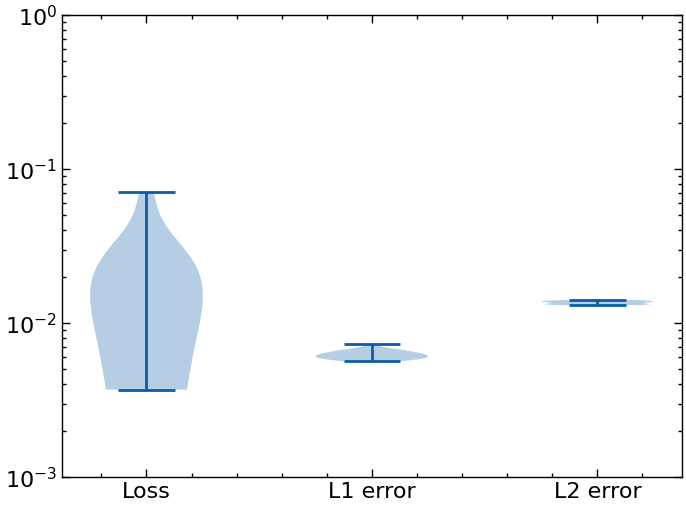

In [10]:
plt.violinplot([nu_loss, L1_err, L2_err])
plt.xticks([1, 2, 3], ['Loss', 'L1 error', 'L2 error'])
plt.ylim(1e-3,1)
plt.yscale('log')

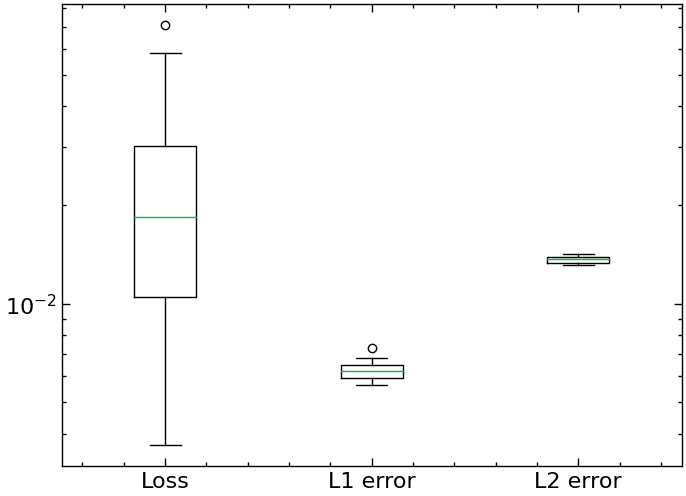

In [11]:
plt.boxplot([nu_loss, L1_err, L2_err], labels=['Loss', 'L1 error', 'L2 error'])
plt.yscale('log')